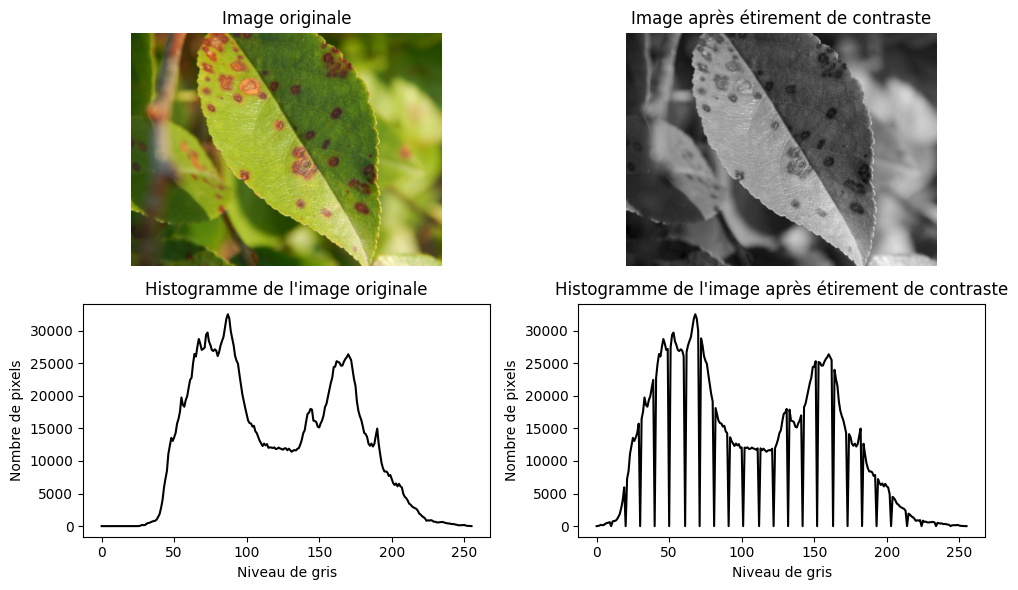

In [33]:
###################################################################################################
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger l'image d'origine
image_path = "./imgs/2.jpg"
image = Image.open(image_path)

# Convertir l'image en niveaux de gris
image_gray = image.convert('L')

# Convertir l'image en tableau numpy
image_array = np.array(image_gray)

# Calculer l'histogramme de l'image d'origine
hist_original, bins_original = np.histogram(image_array.flatten(), bins=256, range=(0, 256))

# Appliquer l'étirement de contraste (par exemple, avec la normalisation min-max)
image_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255

# Assurer que l'image normalisée est en niveaux de gris
image_normalized = image_normalized.astype(np.uint8)

# Calculer l'histogramme de l'image après l'étirement de contraste
hist_normalized, bins_normalized = np.histogram(image_normalized.flatten(), bins=256, range=(0, 256))

# Afficher les images et les histogrammes
plt.figure(figsize=(15, 6))

# Afficher l'image originale
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Image originale")
plt.axis('off')

# Afficher l'histogramme de l'image originale
plt.subplot(2, 3, 4)
plt.plot(hist_original, color='black')
plt.title("Histogramme de l'image originale")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

# Afficher l'image après l'étirement de contraste
plt.subplot(2, 3, 2)
plt.imshow(image_normalized, cmap='gray')
plt.title("Image après étirement de contraste")
plt.axis('off')

# Afficher l'histogramme de l'image après l'étirement de contraste
plt.subplot(2, 3, 5)
plt.plot(hist_normalized, color='black')
plt.title("Histogramme de l'image après étirement de contraste")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

plt.tight_layout()
plt.show()

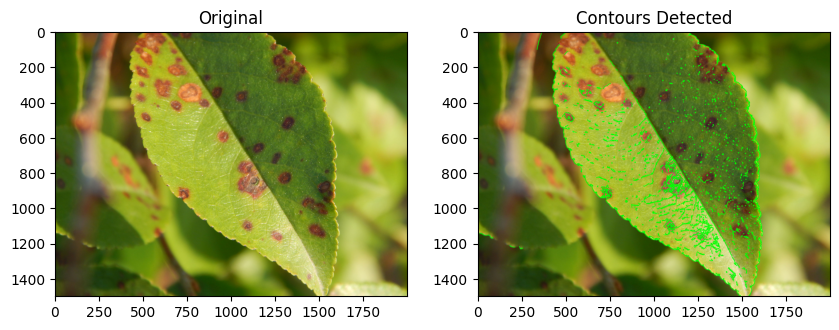

In [34]:
########################################################################
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image_path = "./imgs/2.jpg"
image = cv2.imread(image_path)

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un flou gaussien pour réduire le bruit
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Détection de contours avec l'algorithme de Canny
canny_threshold1 = 30
canny_threshold2 = 100
edges = cv2.Canny(blurred_image, canny_threshold1, canny_threshold2)

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Afficher les résultats
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Detected')

plt.show()

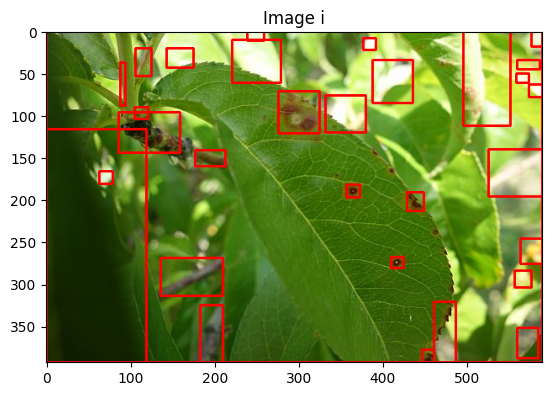

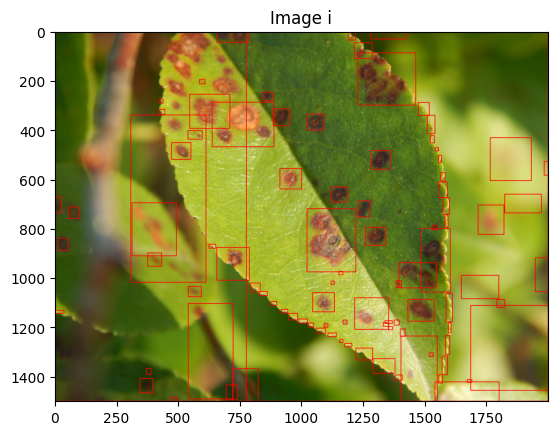

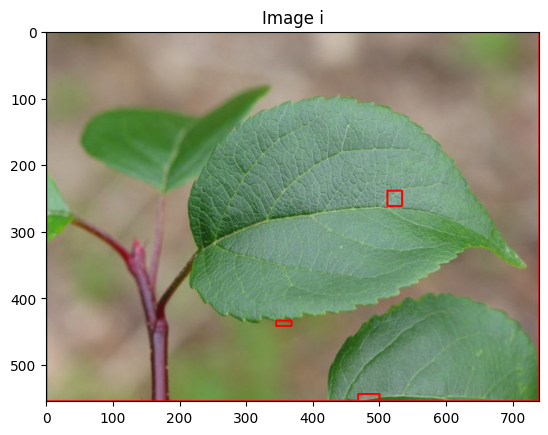

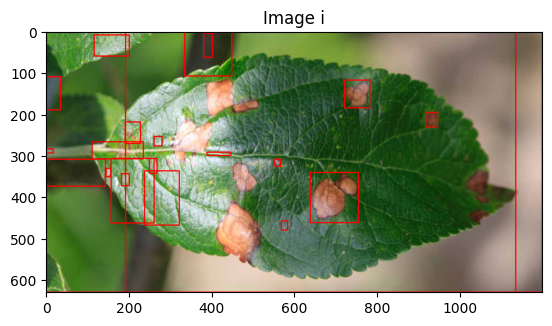

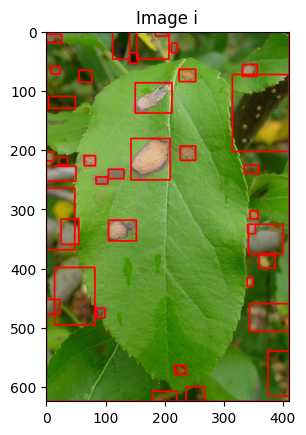

In [35]:
#########################################################################


import numpy as np
import matplotlib.pyplot as plt
import cv2

image_dir = './imgs/'
images = [
    '1.jpg',
    '2.jpg',
    '3.jpg',
    '4.jpg',
    '5.jpg',
]

# Loop through each image
for i in images:
    # Load the image
    image_path = f'{image_dir}{i}'
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a color range for green areas
    lower_green = np.array([30, 50, 50])  # Adjust these values based on the nuances of green in your images
    upper_green = np.array([90, 255, 255])  # Adjust these values based on the nuances of green in your images

    # Create a mask for green areas
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Invert the mask to obtain the non-green parts of the image
    mask_non_green = cv2.bitwise_not(mask_green)

    # Apply region-based segmentation on the non-green parts of the image
    segmented_image, labels, stats, _ = cv2.connectedComponentsWithStats(mask_non_green, 8)

    # Identify potential disease zones based on size and location
    disease_zones = []
    for i, stat in enumerate(stats):
        if stat[4] > 100:  # Adjust this value based on the minimum size of disease zones you want to detect
            disease_zones.append((stat[0], stat[1], stat[2], stat[3]))

    # Draw rectangles around the disease zones on the original image
    for zone in disease_zones:
        x, y, w, h = zone
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the original image with disease zones highlighted
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image i')
    plt.show()

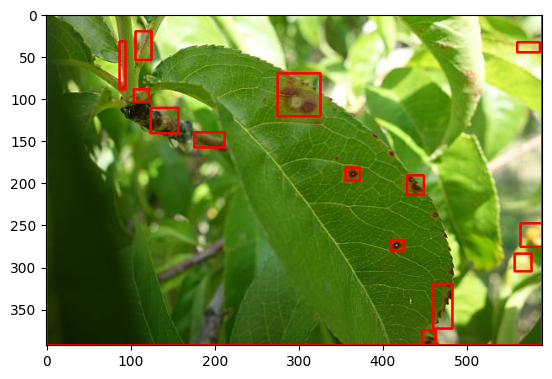

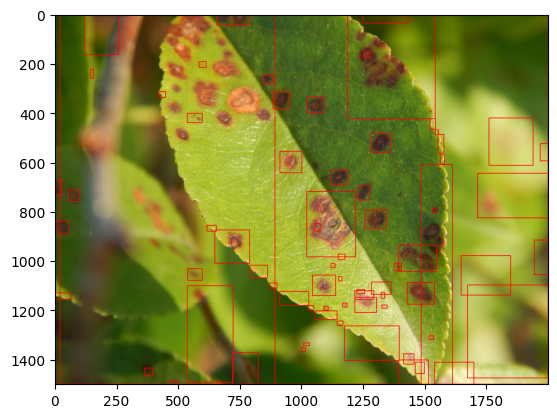

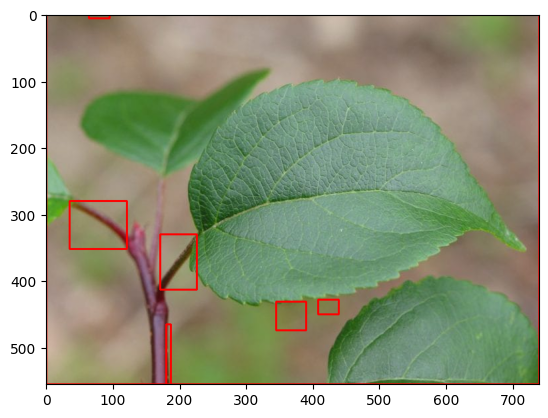

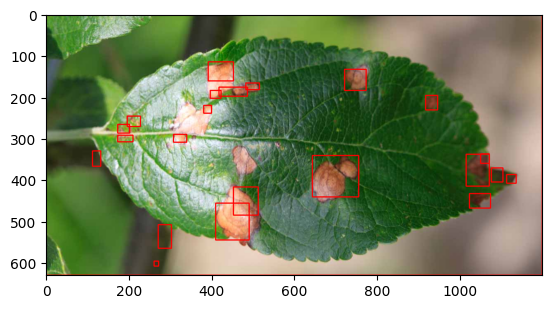

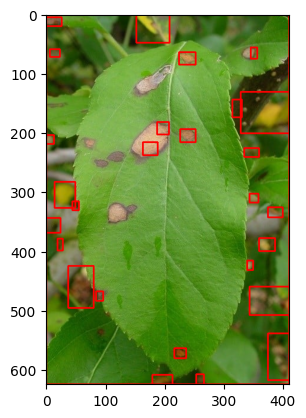

In [36]:
#########################################################################
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_dir = './imgs/'
images = [
    '1.jpg',
    '2.jpg',
    '3.jpg',
    '4.jpg',
    '5.jpg',
]

# Boucle sur les 10 images
for i in images:
    # Charger l'image
    image_path = image_dir + i
    image = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer un flou gaussien pour réduire le bruit
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Suppression de l'arrière-plan à l'aide du soustracteur d'arrière-plan MOG2
    mog2 = cv2.createBackgroundSubtractorMOG2()
    fg_mask = mog2.apply(blurred_image)

    # Appliquer des opérations morphologiques pour affiner le masque avant-plan
    kernel = np.ones((5, 5), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

    # Convertir le masque avant-plan en une image à 3 canaux pour l'affichage
    fg_mask_3ch = cv2.bitwise_and(image, image, mask=fg_mask.astype(np.uint8))

    # Convertir l'image avant-plan en espace de couleur HSV
    fg_hsv = cv2.cvtColor(fg_mask_3ch, cv2.COLOR_BGR2HSV)

    # Définir une plage de couleurs pour les zones potentielles de maladie (taches brunes)
    lower_brown = np.array([10, 100, 50])  # Ajustez ces valeurs en fonction de la couleur des taches brunes dans vos images
    upper_brown = np.array([30, 255, 255])  # Ajustez ces valeurs en fonction de la couleur des taches brunes dans vos images

    # Créer un masque pour les zones potentielles de maladie
    mask_brown = cv2.inRange(fg_hsv, lower_brown, upper_brown)

    # Appliquer l'étiquetage des composantes connectées pour identifier les zones de maladie individuelles
    segmented_image, labels, stats, _ = cv2.connectedComponentsWithStats(mask_brown, 8)

    # Identifier les zones de maladie en fonction de leur taille et de leur emplacement
    disease_zones = []
    for i, stat in enumerate(stats):
        if stat[4] > 100:  # Ajustez cette valeur en fonction de la taille minimale des zones de maladie que vous souhaitez détecter
            disease_zones.append((stat[0], stat[1], stat[2], stat[3]))

    # Dessiner des rectangles autour des zones de maladie sur l'image d'origine
    for zone in disease_zones:
        x, y, w, h = zone
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Afficher l'image d'origine avec les zones de maladie mises en évidence
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def show_image(image, title = "image"):
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(title)
    plt.show()

def show_images(images, titles=None, ncols=2, figsize=(10, 5)):
    if titles is not None:
        assert len(images) == len(titles), "Number of images and titles must be the same."
    
    num_images = len(images)
    nrows = (num_images + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    for i, ax in enumerate(axes.flat):
        ax.axis('off')
        if i < num_images:
            ax.imshow(images[i], cmap='gray', interpolation='none')
            if titles is not None:
                ax.set_title(titles[i])
    
    plt.tight_layout()
    plt.show()

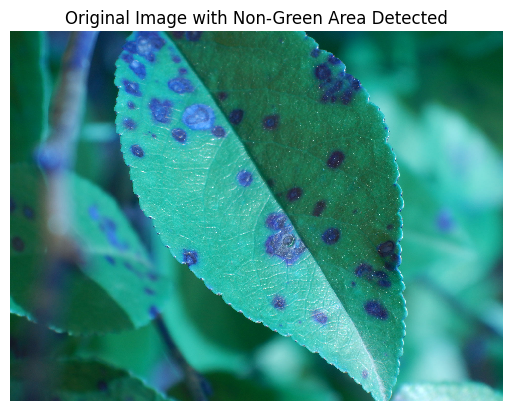

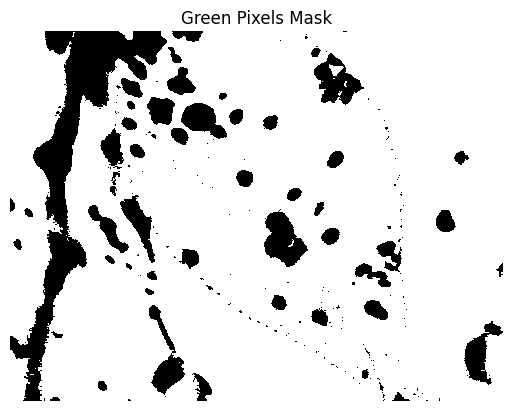

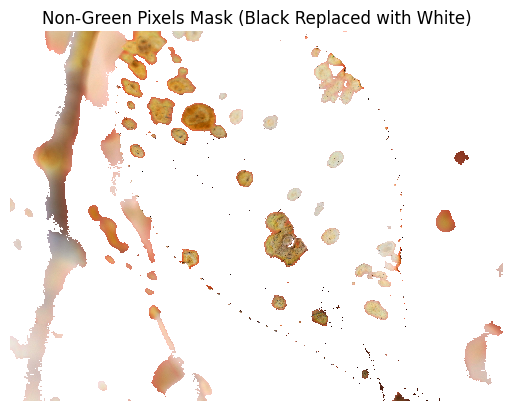

In [38]:
# Step 1: Image Acquisition
image = cv2.imread('./imgs/2.jpg')

# Step 2: Preprocessing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Color Detection
lower_green = np.array([25, 40, 40])  # Adjusted lower threshold for green in HSV
upper_green = np.array([100, 255, 255])  # Adjusted upper threshold for green in HSV

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Step 4: Invert the mask to get the non-green areas
non_green_mask = cv2.bitwise_not(green_mask)

# Step 5: Overlay non-green areas on original image
masked_image = cv2.bitwise_and(image, image, mask=non_green_mask)

# Step 6: Invert the masked image to replace black with white
masked_image_inverted = cv2.bitwise_not(masked_image)

# Step 7: Visualization
show_image(image, 'Original Image with Non-Green Area Detected')
show_image(green_mask, "Green Pixels Mask")
show_image(masked_image_inverted, 'Non-Green Pixels Mask (Black Replaced with White)')

# VIDEO

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def apply(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a color range for brown spots
    lower_brown = np.array([10, 100, 50])  # Adjust these values based on the color of brown spots in your images
    upper_brown = np.array([30, 255, 255])  # Adjust these values based on the color of brown spots in your images

    # Create a mask for brown spots
    mask = cv2.inRange(hsv, lower_brown, upper_brown)

    # Apply connected components labeling to identify individual disease zones
    segmented_image, labels, stats, _ = cv2.connectedComponentsWithStats(mask, 8)

    # Identify disease zones based on size and location
    disease_zones = []
    for i, stat in enumerate(stats):
        if stat[4] > 100:  # Adjust this value based on the minimum size of disease zones you want to detect
            disease_zones.append((stat[0], stat[1], stat[2], stat[3]))

    # Draw rectangles around the disease zones on the original image
    result_image = image.copy()
    for zone in disease_zones:
        x, y, w, h = zone
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw red rectangles

    return result_image

In [40]:
import cv2
import numpy as np

cap = cv2.VideoCapture('./videos/video.mp4')  # Specify the path to your video file

# Get the frame dimensions and frame rate from the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./videos/output_video_squares.avi', fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()  # Read frame from the video
    if not ret:
        break  # Break the loop if the video is over

    # Apply detection function to the frame
    result = apply(frame)

    # Display the original and processed frames
    out.write(result)  # Write the processed frame to the output video

# Release video capture object and close the output video file
cap.release()
out.release()

In [41]:
import cv2
import matplotlib.pyplot as plt

def apply(image):
    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer un flou gaussien pour réduire le bruit
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

    # Détection de contours avec l'algorithme de Canny
    canny_threshold1 = 30
    canny_threshold2 = 100
    edges = cv2.Canny(blurred_image, canny_threshold1, canny_threshold2)

    # Trouver les contours dans l'image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dessiner les contours sur l'image originale
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 1)
    return contour_image


In [42]:
import cv2
import numpy as np

i=2
# Open video capture object
cap = cv2.VideoCapture('./videos/video.mp4')  # Specify the path to your video file

# Get the frame dimensions and frame rate from the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./videos/output_video_contour.avi', fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()  # Read frame from the video
    if not ret:
        break  # Break the loop if the video is over

    # Apply detection function to the frame
    result = apply(frame)

    # Display the original and processed frames
    out.write(result)  # Write the processed frame to the output video

# Release video capture object and close the output video file
cap.release()
out.release()

In [43]:
def apply(image):
    # Step 2: Preprocessing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Color Detection
    lower_green = np.array([25, 40, 40])  # Adjusted lower threshold for green in HSV
    upper_green = np.array([100, 255, 255])  # Adjusted upper threshold for green in HSV

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Step 4: Invert the mask to get the non-green areas
    non_green_mask = cv2.bitwise_not(green_mask)

    # Step 5: Overlay non-green areas on original image
    masked_image = cv2.bitwise_and(image, image, mask=non_green_mask)

    # Step 6: Invert the masked image to replace black with white
    masked_image_inverted = cv2.bitwise_not(masked_image)

    return masked_image_inverted

In [44]:
import cv2
import numpy as np

i=2
# Open video capture object
cap = cv2.VideoCapture('./videos/video.mp4')  # Specify the path to your video file

# Get the frame dimensions and frame rate from the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./videos/output_video_non_green.avi', fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()  # Read frame from the video
    if not ret:
        break  # Break the loop if the video is over

    # Apply detection function to the frame
    result = apply(frame)

    # Display the original and processed frames
    out.write(result)  # Write the processed frame to the output video

# Release video capture object and close the output video file
cap.release()
out.release()